<a href="https://colab.research.google.com/github/Srijita264/Emotion-Detection-Model/blob/main/Eye_Blink_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-plot

In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

In [ ]:
import cv2
import os

folder_path = "/content/drive/MyDrive/eyes/Closed_Eyes"
closed_eyes_images = []
for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        img = cv2.imread(image_path)
        closed_eyes_images.append(img)


In [ ]:
print(len(closed_eyes_images))

2000


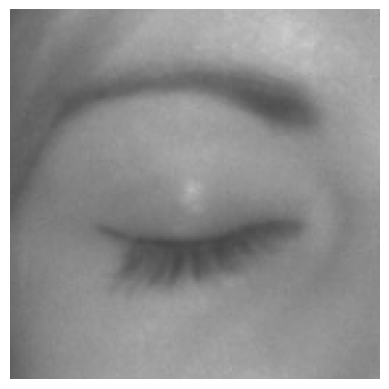

In [ ]:
for i, image in enumerate(closed_eyes_images):
    plt.imshow(image)
    plt.axis('off')


In [ ]:
import cv2
import os

folder_path = "/content/drive/MyDrive/eyes/Open_Eyes"
open_eyes_images = []
for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        img = cv2.imread(image_path)
        open_eyes_images.append(img)


In [ ]:
print(len(open_eyes_images))

2000


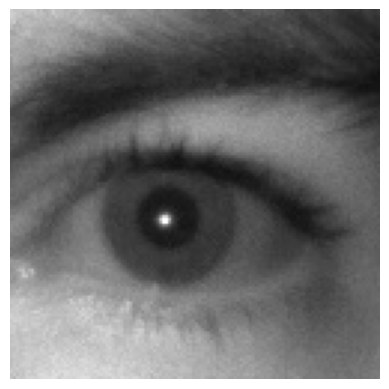

In [ ]:
for i, image in enumerate(open_eyes_images):

    plt.imshow(image)
    plt.axis('off')


In [ ]:
import cv2
import os
import numpy as np

# Function to read and resize images from a folder
def read_and_resize_images(folder_path, target_size=(48, 48)):
    images = []
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
        # Resize the image
        img = cv2.resize(img, target_size)
        # Add channel dimension (1 for grayscale)
        img = np.expand_dims(img, axis=-1)
        images.append(img)
    return images

# Specify the paths to the image folders
open_eyes_folder_path = "/content/drive/MyDrive/eyes/Open_Eyes"
closed_eyes_folder_path = "/content/drive/MyDrive/eyes/Closed_Eyes"

# Read and resize images from each folder
open_eyes_images = read_and_resize_images(open_eyes_folder_path)
closed_eyes_images = read_and_resize_images(closed_eyes_folder_path)

# Stack the arrays along a new axis to create total_images
total_images = np.vstack([open_eyes_images, closed_eyes_images])

# Print or use total_images as needed
print(total_images.shape)  # Shape will show the number of images and their dimensions


(4000, 48, 48, 1)


In [ ]:
import numpy as np

# Assuming you have 2000 images
num_images = 2000

# Create a label array with all 0's
open_eyes_labels = np.ones(num_images, dtype=int)


In [ ]:
import numpy as np

# Assuming you have 2000 images
num_images = 2000

# Create a label array with all 0's
closed_eyes_labels = np.zeros(num_images, dtype=int)


In [ ]:
print(closed_eyes_labels)

[0 0 0 ... 0 0 0]


In [ ]:
total_labels = np.concatenate([open_eyes_labels, closed_eyes_labels])

# Print or use total_labels as needed
print(total_labels)


[1 1 1 ... 0 0 0]


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import to_categorical
import math
import numpy as np
import pandas as pd


In [ ]:
df = pd.DataFrame({'labels': total_labels})

# One-hot encode the 'labels' column
one_hot_encoded = pd.get_dummies(df['labels'], prefix='label')

# Convert the one-hot encoded DataFrame back to a NumPy array
one_hot_encoded_array = one_hot_encoded.values


In [ ]:
print(one_hot_encoded_array )

[[0 1]
 [0 1]
 [0 1]
 ...
 [1 0]
 [1 0]
 [1 0]]


In [ ]:
X_train = np.concatenate((total_images[:1400], total_images[2000:3400]))
y_train = np.concatenate((one_hot_encoded_array [:1400], one_hot_encoded_array [2000:3400]))

In [ ]:
X_valid = np.concatenate((total_images[1400:2000], total_images[3400:4000]))
y_valid = np.concatenate((one_hot_encoded_array [1400:2000], one_hot_encoded_array [3400:4000]))


In [ ]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((2800, 48, 48, 1), (1200, 48, 48, 1), (2800, 2), (1200, 2))

In [ ]:
X_train = X_train / 255.
X_valid = X_valid / 255.

In [ ]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

In [ ]:
num_classes = 2

In [ ]:
def build_net(optim):

    net = Sequential(name='DCNN')

    net.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='elu', input_shape=(48, 48, 1)))
    net.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='elu'))
    net.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))
    net.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='elu'))
    net.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='elu'))
    net.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))
    net.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='elu'))
    net.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='elu'))
    net.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))
    net.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='elu'))
    net.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))
    net.add(Flatten())
    net.add(Dense(256, activation='relu'))
    net.add(Dropout(0.25))
    net.add(Dense(128, activation='relu'))
    net.add(
        Dense(
            num_classes,
            activation='softmax',
            name='out_layer'
        )
    )

    net.compile(
        loss='categorical_crossentropy',
        optimizer=optim,
        metrics=['accuracy']
    )
    net.summary()

    return net


In [ ]:
filepath = 'eye_model.h5'
checkpoint = ModelCheckpoint(
    filepath,
    monitor="val_loss",
    verbose=0,
    save_best_only=False,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
    initial_value_threshold=None,
)
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
    checkpoint,
]


In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
)
train_datagen.fit(X_train)


In [ ]:
batch_size = 32 #batch size of 32 performs the best.
epochs = 100
optims = [
    optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Nadam'),
    optimizers.Adam(0.001),
]

model = build_net(optims[1])
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_valid, y_valid),
    steps_per_epoch=len(X_train) / batch_size,
    epochs=epochs,
    callbacks=callbacks,
    use_multiprocessing=True
)



Model: "DCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                         

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


87/87 [==============================] - 4s 39ms/step - loss: 0.1480 - accuracy: 0.9429 - val_loss: 0.0891 - val_accuracy: 0.9775 - lr: 0.0010
Epoch 3/100
87/87 [==============================] - 3s 39ms/step - loss: 0.0937 - accuracy: 0.9682 - val_loss: 0.6664 - val_accuracy: 0.8833 - lr: 0.0010
Epoch 4/100
87/87 [==============================] - 3s 36ms/step - loss: 0.0375 - accuracy: 0.9886 - val_loss: 0.2778 - val_accuracy: 0.9333 - lr: 0.0010
Epoch 5/100
87/87 [==============================] - 3s 39ms/step - loss: 0.0296 - accuracy: 0.9896 - val_loss: 0.7544 - val_accuracy: 0.8758 - lr: 0.0010
Epoch 6/100
87/87 [==============================] - 4s 43ms/step - loss: 0.0468 - accuracy: 0.9854 - val_loss: 0.1772 - val_accuracy: 0.9642 - lr: 0.0010
Epoch 7/100
87/87 [==============================] - 3s 36ms/step - loss: 0.0244 - accuracy: 0.9914 - val_loss: 0.2760 - val_accuracy: 0.9483 - lr: 0.0010
Epoch 8/100
87/87 [==============================] - 3s 36ms/step - loss: 0.0077 -

In [ ]:
model.save('eye_model.h5')

In [ ]:
model.evaluate(X_train, y_train)

88/88 [==============================] - 1s 6ms/step - loss: 6.3048e-05 - accuracy: 1.0000


[6.304796988843009e-05, 1.0]

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = load_model('eye_model.h5')  # Replace with the path to your saved model

# Load and preprocess the input image
img_path = '/content/drive/MyDrive/closed.jpg'
img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize pixel values to be between 0 and 1

# Make predictions
predictions = model.predict(img_array)

# Assuming binary classification, use a threshold to decide the class
threshold = 0.5
predicted_class = 1 if predictions[0][0] > threshold else 0

# Print the predictions
print("Predictions:", predictions)
print("Predicted Class:", predicted_class)


1/1 [==============================] - 1s 502ms/step
Predictions: [[9.9981743e-01 1.8264557e-04]]
Predicted Class: 1


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = load_model('eye_model.h5')  # Replace with the path to your saved model

# Load and preprocess the input image
img_path = '/content/drive/MyDrive/open1.jpg'
img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize pixel values to be between 0 and 1

# Make predictions
predictions = model.predict(img_array)

# Assuming binary classification, use a threshold to decide the class
threshold = 0.5
predicted_class = 1 if predictions[0][0] > threshold else 0

# Print the predictions
print("Predictions:", predictions)
print("Predicted Class:", predicted_class)


1/1 [==============================] - 0s 114ms/step
Predictions: [[0. 1.]]
Predicted Class: 0


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = load_model('eye_model.h5')  # Replace with the path to your saved model

# Load and preprocess the input image
img_path = '/content/drive/MyDrive/open_eyes.jpg'
img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize pixel values to be between 0 and 1

# Make predictions
predictions = model.predict(img_array)

# Assuming binary classification, use a threshold to decide the class
threshold = 0.5
predicted_class = 1 if predictions[0][0] > threshold else 0

# Print the predictions
print("Predictions:", predictions)
print("Predicted Class:", predicted_class)


1/1 [==============================] - 0s 104ms/step
Predictions: [[4.2793983e-21 1.0000000e+00]]
Predicted Class: 0


In [ ]:
from google.colab import files

files.download('model5.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>